<h1 align = "center">Principal Component Analysis (PCA)</h1>

---

<p align = "justify" style = "color:#313a8f"><b>Principal Component Analysis (PCA)</b> fundamentally tries to minimise the dimensions/features of a data set (consists of say <code>d</code>-dimensions) to a lower dimension (which is usually <i>two</i>). In other words, it tries to project the data into a new "subspace" that can distinguish the patterns between the dimensions which are relatable to each other. Mathematically, PCA tries to find a new set of axis which has the maximum "variance" of the data <a href = "https://sebastianraschka.com/Articles/2014_pca_step_by_step.html">[1]</a>.</p>

**Objective:** The `decompose` library serves as a basic library which have implemented the `PCA()` algorithm similar to `sklearn.decompose.PCA()`, but only minimal parameters are defined. Serves as the backbone for the paper titled _"Reliable Estimation of Dissipation Factor of In-service Power Transformer"_ (submitted) by Debmalya Pramanik and Arijit Baral. The example serves the following to the viewers:
1. Explains the mathematical foundation of PCA,
2. Gives as overview of how to use the `decompose.PCA()` function, and
3. Predict the `iris` data set using this library, and validate with `sklearn.decompose.PCA`.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline
sns.set_style('whitegrid');
plt.style.use('default-style');

np.set_printoptions(
        precision = 3,  # floating point numbers are limited to three decimal places (while printing)
        threshold = 15, # if a np.ndarray is more than (15, -1) times long - then show summary
    )

**Notes:** [`plt.style.use`](https://matplotlib.org/1.5.3/users/style_sheets.html) can be used to style any plots with either pre-defined styles (from matplotlib) or you can even set your own. You can find the stylesheet from [my GitLab repository](https://gitlab.com/ZenithClown/computer-configurations-and-setups).

## Refresher Course

Before diving into the mathematics of PCA and actual implementations, let's revise some of the basic, which are required for implementation of PCA. Note - some useful links and external guidance links are also present in the **credits** section!

### Eigen Values and Eigen Vectors

For a matrix $A$, the **Eigen Vector** ($\bar{v}$) is defined as a vector that changes at most by a scalar multiplier when a linear transformaion is applied on it. Mathematically, it can be written as:

$$ \label{eig}
    A \bar{v} = \lambda \bar{v} \\
$$

where, $\lambda$ is the **Eigen Value** of $A$, and $I$ is an identity matrix. To solve for eigen values and eigen vectors, we can rewrite eqn. (\ref{eig}) as:

$$ \label{eig-char}
    (A - \lambda I) \bar{v} = \bar{0}
$$

Since, $\bar{v} \neq 0$, hence from eqn (\ref{eig-char}) we can not that $det(A - \lambda I) = 0$.

### Covariance

It is defined as the measure of joint variablity, and is given as:

$$
    cov(x, y) = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{N - 1}
$$

where, $\bar{x}$ and $\bar{y}$ is the mean of variable $x$ and $y$ respectively; and $N$ is the number of data points.

In [2]:
from sklearn.datasets import load_iris

## Iris Dataset

One of the most basic and widely known dataset that has been used in many literature and articles. The dataset consists of **3**-type classes **`{setosa, versicolour, virginica}`**, of which one is linearly seperable while the other two are not [[2]](https://archive.ics.uci.edu/ml/datasets/iris). This dataset is used as an example to understand and implement the PCA algorithm that is developed in this module.

In [3]:
iris = load_iris()

In [4]:
pd.DataFrame(iris["data"])[0].apply(lambda x : 1 if x > 2 else 0)

0      1
1      1
2      1
3      1
4      1
      ..
145    1
146    1
147    1
148    1
149    1
Name: 0, Length: 150, dtype: int64

We define **`X`** as the input variable, and **`y`** as the target. For any machine learning algorithm, especially PCA, it is very important to normalize the data. For this, I use the `MinMaxScaler`, which is mathematically defined as follows [[3]](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html):

$$
    X_{std} = \frac{x - x_{min}}{x_{max} - x_{min}} \\
    \\
    X_{scaled} = X_{std} * (max - min) + min
$$

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
X, y = iris.data, iris.target
X = MinMaxScaler().fit_transform(X)

In [7]:
X.shape, y.shape

((150, 4), (150,))

## Principal Component Analysis

As discussed, the idea behind PCA is to minimize the dimensions of the data. In this section, first let's understand how to acheive PCA by means of a flowchart. Given the mathematical foundation and the minimalistic approcach in desgining a PCA algorithm, the same is developed using **`numpy`** and the components are calculated.

![PCA Flowchart](pca-flowchart.png)

In [7]:
import decompose

In [8]:
dPCA = decompose.PCA()
principalComponents = dPCA.fit_transform(X)

(150, 4) (4, 4)


### Scree Plot

Generally, using PCA (or infact any other dimensional reduction algorithm) the data is reduced to 2-dimensions. However, to better understand this we can draw a `scree`-plot to determine which features to retain.

In [14]:
ComponentVariation = pd.DataFrame({
    "Principal Components"             : [f"PC-{i}" for i in range(1, len(dPCA.explained_variance_) + 1)],
    "Percentage of Explained Variance" : np.round(dPCA.explained_variance_, decimals = 3),
    "Cumulative Percentage"            : np.round(dPCA.cum_explained_variance_, decimals = 3)
})

ComponentVariation

,Principal Components,Percentage of Explained Variance,Cumulative Percentage
0,PC-1,84.136,84.136
1,PC-2,11.752,95.888
2,PC-3,3.474,99.361
3,PC-4,0.639,100.000


Evidently, **`95.8%`** of the variance is explained by the first two components!

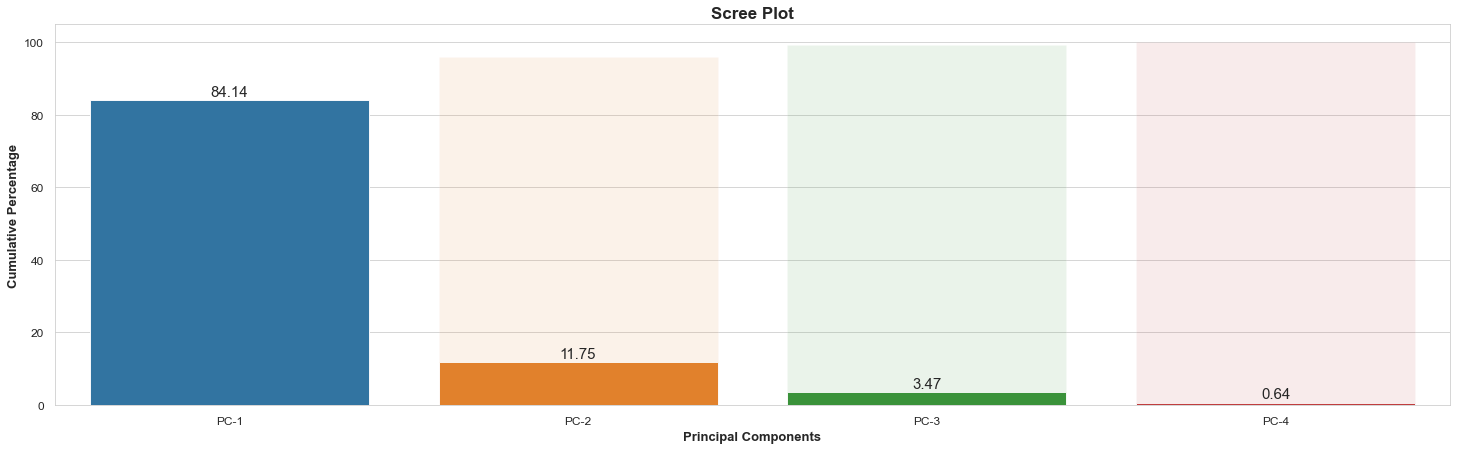

In [17]:
bar_plot = sns.barplot(x = "Principal Components", y = "Percentage of Explained Variance", data = ComponentVariation)

for bar in bar_plot.patches:
    # https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
    bar_plot.annotate(
        format(bar.get_height(), '.2f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha = "center", va = "center", size = 15, xytext = (0, 8),
        textcoords = "offset points"
    )
    
# draw cummulative percentage
sns.barplot(x = "Principal Components", y = "Cumulative Percentage", data = ComponentVariation, alpha = 0.1)

plt.title("Scree Plot")
plt.show()

In [28]:
print(f"No. of Components = {dPCA.n_components}")

No. of Components = 4


In [9]:
PCAResult = pd.DataFrame(principalComponents, columns = [f"PCA-{i}" for i in range(1, dPCA.n_components + 1)])
PCAResult["target"] = y # possible as original order does not change

PCAResult

,PCA-1,PCA-2,PCA-3,PCA-4,target
0,0.068898,-0.654521,0.072618,-0.089008,0
1,0.076696,-0.442683,0.042195,-0.063956,0
2,0.030081,-0.495526,0.110981,-0.088881,0
3,0.045449,-0.444058,0.114555,-0.116429,0
4,0.050813,-0.680430,0.106452,-0.108101,0
...,...,...,...,...,...
145,1.251063,-0.606784,0.177620,0.013777,2
146,1.106748,-0.375122,0.087234,-0.031074,2
147,1.146744,-0.584503,0.140883,-0.063573,2
148,1.187809,-0.696620,0.330546,-0.099179,2


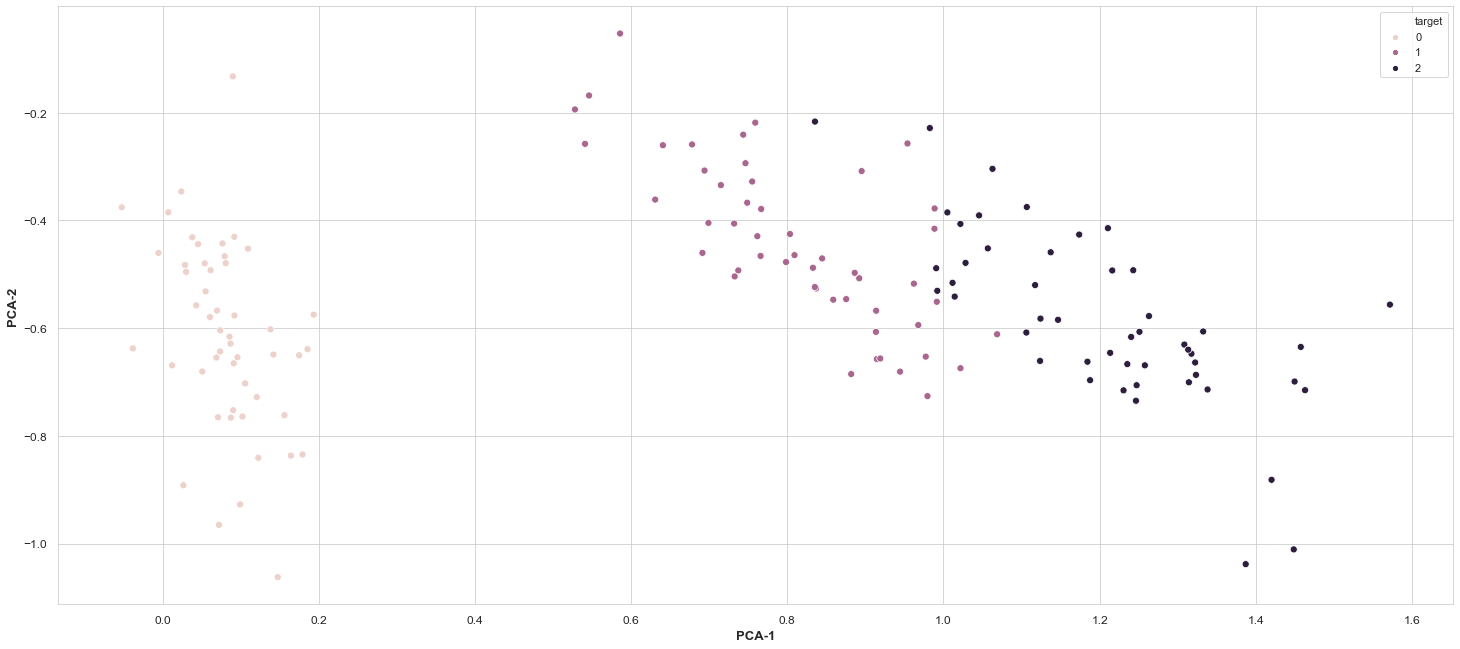

In [10]:
plt.figure(figsize = (25, 11))
sns.scatterplot(x = "PCA-1", y = "PCA-2", data = PCAResult, hue = "target", s = 50)

plt.show()

### Verification with `sklearn`

The `sci-kit learn (sklearn)` library comes with the PCA algorithm. Note the object for `decompose.PCA` is defined as **`dPCA`** and in `sklearn.decomposition` it is defined as **`sPCA`**.

In [38]:
from sklearn.decomposition import PCA

In [39]:
sPCA = PCA() # consider all the components

In [41]:
principalComponents_ = sPCA.fit_transform(X)

# explained variance
sPCA.explained_variance_ratio_ * 100

array([84.136, 11.752,  3.474,  0.639])

It is evident from the `explained_variance_ratio_` that both gives the same result. Just for visual confirmation, the PCA of first two components is as below.

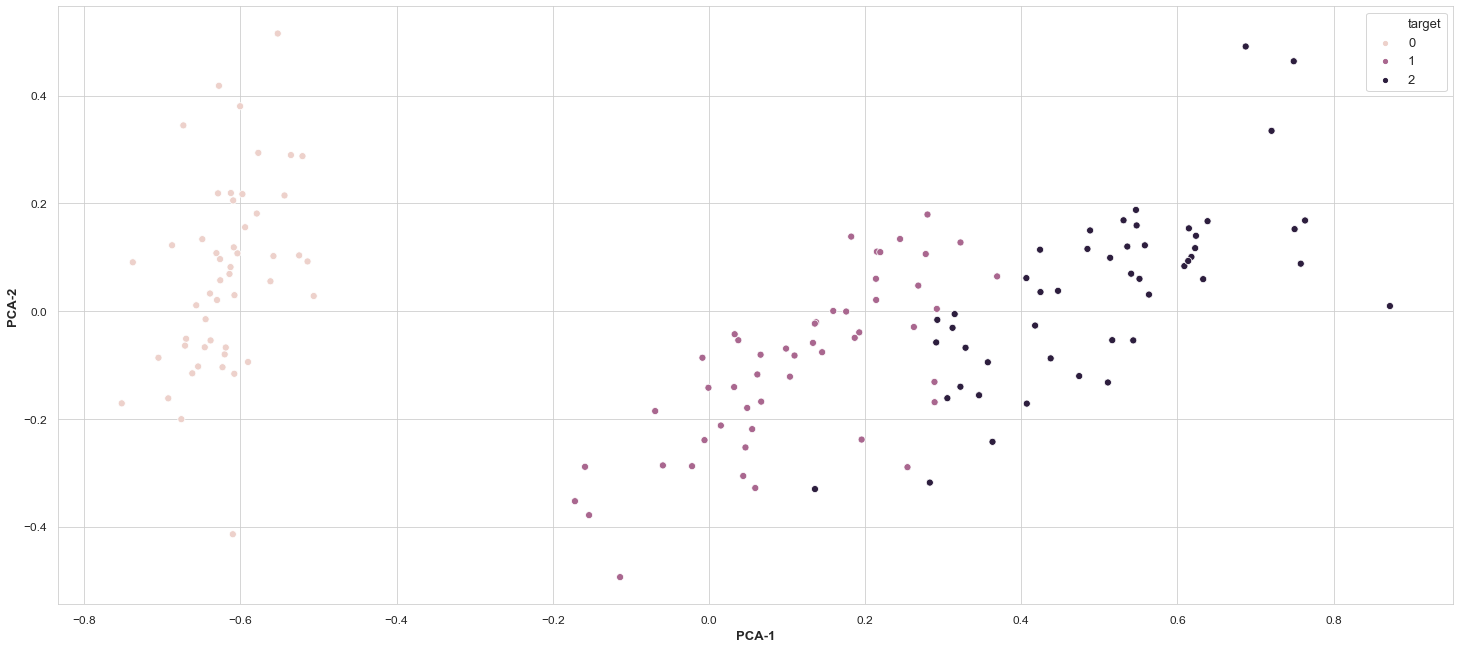

In [43]:
PCAResult_ = pd.DataFrame(principalComponents_, columns = [f"PCA-{i}" for i in range(1, 5)])
PCAResult_["target"] = y # possible as original order does not change

plt.figure(figsize = (25, 11))
sns.scatterplot(x = "PCA-1", y = "PCA-2", data = PCAResult_, hue = "target", s = 50)

plt.show()

## Footnote
We're able to build a small code to find `PCA` of a given dataset. This is used for our analysis. Now, one question reader might ask is **why the orientation** is bit different in both the cases. To answer it, PCA is just a SVD of data variable `X` - that means there is no gurantee it returns the same result everytime. Understandably, scikit learn implementation wants to avoid this: they guarantee that the left and right singular vectors returned (stored in U and V) are always the same, by imposing (which is arbitrary) that the largest coefficient of $u_i$ in absolute value is positive [[2]](https://stackoverflow.com/a/44847053/6623589). Considering the `iris` dataset, we can see that the SVD values are -ve, meaning we need to flip the values, as explained below.

Another observation is that $x \in (-0.8, 0.8)$ for `sklearn.decomposition.PCA` but the same is $x \in (-0.1, 1.6)$ is beacuse of different normalization/standardization of data.

In [11]:
from copy import deepcopy

In [12]:
copied = deepcopy(PCAResult) # ensure original information is kept intact
copied

,PCA-1,PCA-2,PCA-3,PCA-4,target
0,0.068898,-0.654521,0.072618,-0.089008,0
1,0.076696,-0.442683,0.042195,-0.063956,0
2,0.030081,-0.495526,0.110981,-0.088881,0
3,0.045449,-0.444058,0.114555,-0.116429,0
4,0.050813,-0.680430,0.106452,-0.108101,0
...,...,...,...,...,...
145,1.251063,-0.606784,0.177620,0.013777,2
146,1.106748,-0.375122,0.087234,-0.031074,2
147,1.146744,-0.584503,0.140883,-0.063573,2
148,1.187809,-0.696620,0.330546,-0.099179,2


At a glance, it is evident that `PCA-2` has a negative value. Multiplying the value with $-1$, we get:

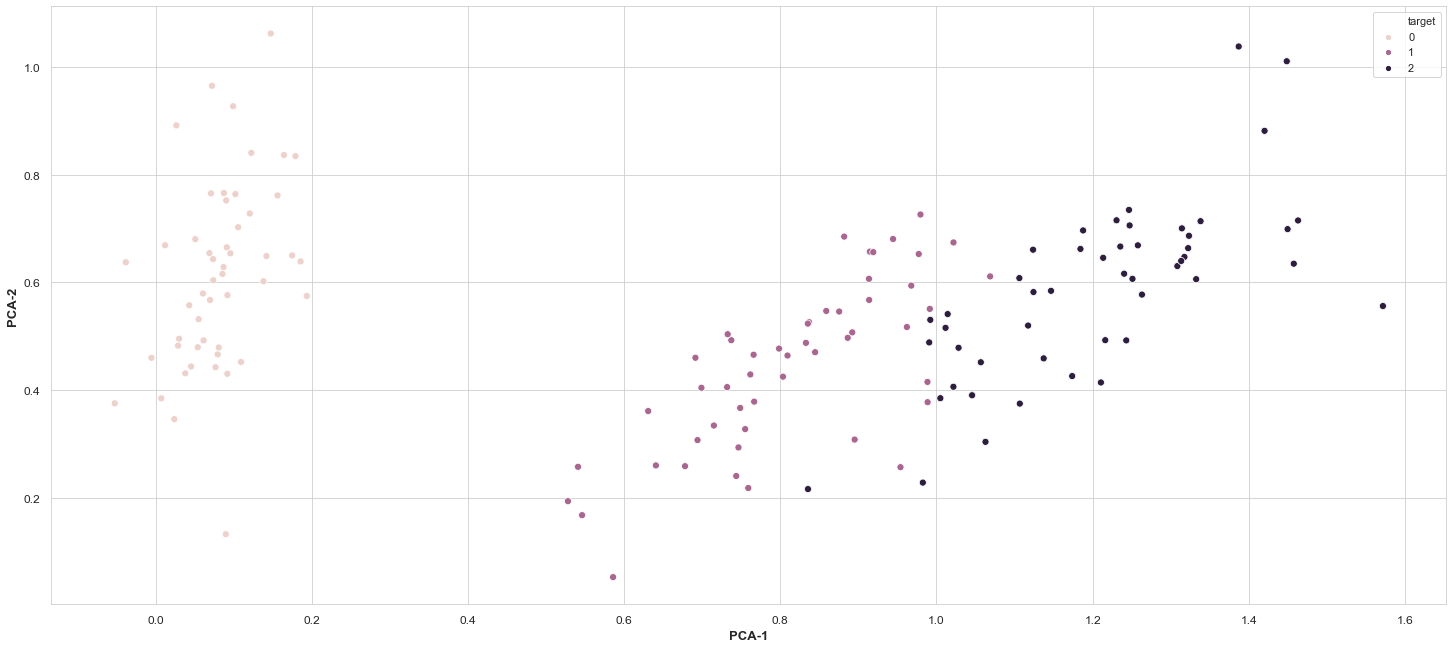

In [14]:
# multiply PCs with (-1)
copied["PCA-2"] = copied["PCA-2"] * (-1)

plt.figure(figsize = (25, 11))
sns.scatterplot(x = "PCA-1", y = "PCA-2", data = copied, hue = "target", s = 50)

plt.show()

## Credits

* 3Blue 1Brown's YouTube Channel for an amazing [Visual Representation](https://www.youtube.com/watch?v=PFDu9oVAE-g) on Eigen Values and Eigen Vectors.
* [Properties and Important Results on Eigens](https://www.youtube.com/watch?v=1wjXVdwzgX8) by Dr. Gajendra Purohit. [Note: Video is delivered in Hindi Language]
* [Covariance and Correlation - Part 1](https://www.youtube.com/watch?v=qtaqvPAeEJY) by StatQuest with Josh Starmer.

## References

[1] Raschka, S. (2015). _Python Machine Learning_. Packt Publishing Ltd.

[2] Stack-Overflow (SO) QA - community users for pointing out the normalization [issue](https://github.com/ZenithClown/decompose/issues/1)